# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [162]:
boston = pd.read_csv('../data/boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [163]:
# checking for nans
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [164]:
# checking for outliers

#z = np.abs(stats.zscore(boston))
#z.shape

#boston = boston[(z < 3).all(axis=1)]
#boston.shape

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [165]:
#sns.pairplot(boston)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

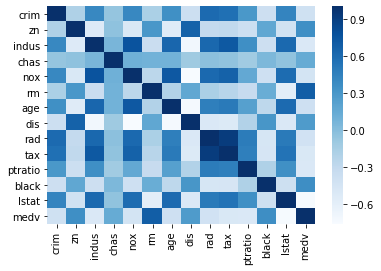

In [166]:
sns.heatmap(boston.corr(), cmap= 'Blues')

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [167]:
# there's a high correlation between tax and rad. 
# there's also highly negative correlation between other variables like dis, indus nox and age.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [168]:
boston.describe()['medv']

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [169]:
from sklearn.metrics import r2_score, mean_squared_error

# uncomment return line to get different metric.
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    #return r2_score(y_true, y_predict)
    return mean_squared_error(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [170]:
from sklearn.model_selection import train_test_split
y = boston['medv']
X = boston.drop(labels='medv', axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 24)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [171]:
from sklearn.ensemble import RandomForestRegressor

depths = [2, 4, 6, 8, 10]

train_scores = []
test_scores = []

for d in depths:
    # initialize model
    rfr = RandomForestRegressor(max_depth=d)
    # fit
    rfr.fit(X_train, y_train)
    # predict test
    y_pred_test = rfr.predict(X_test)
    # predict train
    y_pred_train = rfr.predict(X_train)
    
    # get scores
    test_score = performance_metric(y_test, y_pred_test)
    train_score = performance_metric(y_train, y_pred_train)
    
    train_scores += [train_score]
    test_scores += [test_score]


C:\Users\Zaca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Zaca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Zaca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Zaca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Zaca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Now, plot the score for each tree on the training set and on the testing set.

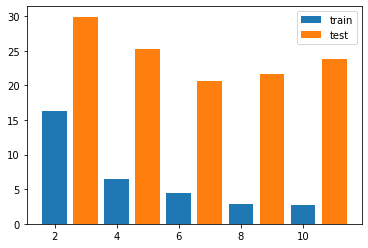

In [178]:
# plot train scores
plt.bar(x=depths, height=train_scores, label='train')
# plot test scores
plt.bar(x=[d+1 for d in depths], height=test_scores, label='test')
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [173]:
# the depth of the trees doesn't seem to change much the performance of the model. But it looks like 
# the model may be overfitting because the training set improves but the testing does not.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [174]:
# I would say regardless of the max depth that there is high bias, the model is consistently 
# underpredicting the target variable.
# When I do the same plot but for the MSE I find that de model has very high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [175]:
# I'm really unsure about this question. In my opinion it looks like this model has problems overfitting the data. 
# There are very high differences in score between train fitting and test fitting, especially for the MSE.
# If I had to choose one of the parameters it would be 2. 


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [176]:
from sklearn.datasets import load_boston
boston_features = load_boston()
print(boston_features.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [177]:
# It seems to me that while data is old, there should be some features that still predict prices
# regarless of year. But if we want to apply a model fitted to this data today wouldn't be the best choice.
# Especially because a lot of this dataset refers to geographical and demographical features and not really about the 
# property itself.

# removing outliers doesn't really seem to help much in the perfomance of this model. At least using z-score removal. 
